In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_likert
from wordcloud import WordCloud, STOPWORDS

import json
import unicodedata
import re

In [14]:
with open('data/artists-replace.json') as f: 
    data = f.read()
responses_map = json.loads(data)

In [3]:
asce25 = pd.read_csv('data/asce-survey-2024-25.csv')
asce25.drop(columns=['StartDate', 'EndDate', 'Status', 'IPAddress', 'RecipientLastName',\
                     'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude',\
                     'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q5', 'Q14_4',\
                     'Q14_5', 'Q14_7', 'Q14_8', 'Q14'], inplace=True)

In [4]:
asce25

,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,...,Q9_10_TEXT,Q10_1,Q10_2,Q10_3,Q10_4,Q11.1,Q12,Q13,Q15,Q15_7_TEXT
0,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,How familiar are you with the events provided ...,How familiar are you with the events provided ...,How familiar are you with the events provided ...,How familiar are you with the events provided ...,How familiar are you with the events provided ...,...,Please rank which of the following will most l...,How likely are you to agree with the following...,How likely are you to agree with the following...,How likely are you to agree with the following...,How likely are you to agree with the following...,"In your own words, how would you describe the ...",What year are you?,What college are you from?,Choose one or more races that you consider you...,Choose one or more races that you consider you...
1,"{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""QID18_1""}","{""ImportId"":""QID18_2""}","{""ImportId"":""QID18_3""}","{""ImportId"":""QID18_4""}","{""ImportId"":""QID18_5""}",...,"{""ImportId"":""QID7_10_TEXT""}","{""ImportId"":""QID8_1""}","{""ImportId"":""QID8_2""}","{""ImportId"":""QID8_3""}","{""ImportId"":""QID8_4""}","{""ImportId"":""QID9_TEXT""}","{""ImportId"":""QID10""}","{""ImportId"":""QID11""}","{""ImportId"":""QID15""}","{""ImportId"":""QID15_7_TEXT""}"
2,100,522,True,2024-10-11 15:57:19,R_6GBaWlNkOro1bfw,Moderately familiar,Not familiar at all,Not familiar at all,Moderately familiar,Moderately familiar,...,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,"Everything, only reason why people come here",Second Year,John Muir College,Asian,NaN
3,100,1055,True,2024-10-11 23:09:26,R_7A0VjSTxK8MayqY,Not familiar at all,Not familiar at all,Slightly familiar,Slightly familiar,Not familiar at all,...,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,First Year,Sixth College,Asian,NaN
4,100,641,True,2024-10-16 14:55:16,R_5nARg9l8wqEDQAU,Moderately familiar,Not familiar at all,Not familiar at all,Slightly familiar,Not familiar at all,...,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,First Year,Eighth College,White or Caucasian,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,25,6926,False,2024-11-08 17:14:29,R_17EuwK2GfUYsT02,Slightly familiar,Not familiar at all,Slightly familiar,Not familiar at all,Not familiar at all,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4418,4,2,False,2024-11-08 17:24:29,R_5emFoAvPi2Ck43z,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4419,50,10562,False,2024-11-08 18:23:26,R_6QKsUbD6qFDRrKN,Very familiar,Moderately familiar,Not familiar at all,Not familiar at all,Not familiar at all,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4420,4,2,False,2024-11-08 18:32:03,R_7PdzSA0t4j6o6V1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Q1_1 - How familiar are you with Bear Garden
# Q1_2 - How familiar are you with You at the Loft (YATL)
# Q1_3 - Ballroom Concerts
# Q1_4 - ASCE Movie Screenings
# Q1_5 - Horizon
# Q1_6 - Sun God Festival
# Q1_7 - ASCE General Body Meetings
# Q2 - How would you like to hear about events on campus? - Selected Choice (3]
# Q2_3_TEXT - Other (please specify) - Text
# Q3 - Top three types of events that you would be interested in attending? - Selected Choice (3]
# Q3_15_TEXT - Other (please specify) - Text
# Q4 - What interests or hobbies would you like to see represented in an event? - Selected Choice (3]
# Q4_19_TEXT - Other (please specify) - Text
# Q6 - What social and political topics represented? - Selected Choice (3]
# Q6_7_TEXT - Other (please specify) - Text
# Q7 - Day(s) of the week? - Selected Choice (7]
# Q8 - Freebies/merchandise? - Text
# Q9 - Food items? - Text
# Q10 - Amount spent on food? - Selected Choice
# Q11 - Food accommodations? - Selected Choice
# Q11_4_TEXT - Religious (please specify) - Text
# Q11_3_TEXT - Allergies (please specify) - Text
# Q11_7_TEXT - Other (please specify) - Text
# Q1_1 - Importance for SGF25 - Headlining Musical Artists
# Q1_2 - Importance for SGF25 - Other Entertainment (Comedians, Stilt Walkers, etc.)
# Q1_3 - Importance for SGF25 - Games
# Q1_4 - Importance for SGF25 - Food Vendors
# Q1_5 - Importance for SGF25 - Sponsorship Experiences
# Q1_6 - Importance for SGF25 - Freebies
# Q1_7 - Importance for SGF25 - Art & Decor
# Q1_8 - Importance for SGF25 - Photo Ops
# Q1_9 - Importance for SGF25 - Student Involvement (Student Performers, Student Art, etc.)
# Q1_10 - Importance for SGF25 - Other
# Q1_10_TEXT - Other (please specify) - Text
# Q2 - Musical genres for SGF25 - Selected Choice (3]
# Q2_13_TEXT - Other (Please Specify) - Text
# Q3_1 - Artist 1
# Q3_2 - Artist 2
# Q3_3 - Artist 3
# Q4_1 - Up and Coming Artist 1
# Q4_2 - Up and Coming Artist 2
# Q4_3 - Up and Coming Artist 3
# Q5_1 - Importance for SGF25 - Health and Safety | COVID Precautions
# Q5_2 - Importance for SGF25 - Diverse Genres
# Q5_3 - Importance for SGF25 - Representation in Artists
# Q5_4 - Importance for SGF25 - Variety of Activities
# Q5_5 - Importance for SGF25 - Food Vendors and the Cost of Food
# Q5_6 - Importance for SGF25 - Sun God Branding
# Q5_7 - Importance for SGF25 - Art Pieces | Experiences
# Q6 - Carnival rides/activities for SGF25 - Text
# Q7 - Sponsors for SGF25 - Text
# Q8 - Student Orgs at SGF25
# Q9_1 - Attendance for SGF 25 - Talent Line-Up
# Q9_2 - Attendance for SGF 25 - Food Vendors
# Q9_3 - Attendance for SGF 25 - Art Installations
# Q9_4 - Attendance for SGF 25 - Games and Activities
# Q9_5 - Attendance for SGF 25 - Brand Activations/Sponsorships
# Q9_6 - Attendance for SGF 25 - Sun God Festival Branding/Aesthetic
# Q9_7 - Attendance for SGF 25 - Weather
# Q9_8 - Attendance for SGF 25 - Health and Safety
# Q9_9 - Attendance for SGF 25 - Accessibility
# Q9_10 - Attendance for SGF 25 - Other (please specify)
# Q9_10_TEXT - Other (Please specify) - Text
    # Q10_1 - Agreement? - The Sun God Festival is the highlight of the academic year
    # Q10_2 - Agreement? - I am excited to attend the Sun God Festival this year with my peers
    # Q10_3 - Agreement? - The Sun God Festival makes me feel a part of the Triton Community.
    # Q10_4 - Agreement? - The Sun God Festival has/will improve my experience as a UC San Diego Student/
    # Q11 - In your own words, how would you describe the Sun God Festival?
# Q12 - Year?
# Q13 - College?
# Q15 - Choose one or more races that you consider yourself to be - Selected Choice
# Q15_7_TEXT - Other - Text

In [6]:
asce25.columns

Index(['Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate',
       'ResponseId', 'Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7',
       'Q2', 'Q2_3_TEXT', 'Q3', 'Q3_15_TEXT', 'Q4', 'Q4_19_TEXT', 'Q6',
       'Q6_7_TEXT', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11_4_TEXT', 'Q11_3_TEXT',
       'Q11_7_TEXT', 'Q1_1.1', 'Q1_2.1', 'Q1_3.1', 'Q1_4.1', 'Q1_5.1',
       'Q1_6.1', 'Q1_7.1', 'Q1_8', 'Q1_9', 'Q1_10', 'Q1_10_TEXT', 'Q2.1',
       'Q2_13_TEXT', 'Q3_1', 'Q3_2', 'Q3_3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q5_1',
       'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6', 'Q5_7', 'Q6.1', 'Q7.1', 'Q8.1',
       'Q9_1', 'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q9_8', 'Q9_9',
       'Q9_10', 'Q9_10_TEXT', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q11.1',
       'Q12', 'Q13', 'Q15', 'Q15_7_TEXT'],
      dtype='object')

In [7]:
asce25['Q1_1'].iloc[2:].value_counts()

Q1_1
Not familiar at all    1069
Moderately familiar     724
Slightly familiar       506
Very familiar           417
Extremely familiar      298
Name: count, dtype: int64

In [8]:
def remove_accents(text):
    normalized_text = unicodedata.normalize('NFD', text)
    unaccented_text = ''.join(char for char in normalized_text if unicodedata.category(char) != 'Mn')
    return unaccented_text

def remove_emojis(text):
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alchemical Symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  # Enclosed Characters
        r"!"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)

artists = pd.concat([
    asce25['Q3_1'].iloc[2:],
    asce25['Q3_2'].iloc[2:],
    asce25['Q3_3'].iloc[2:]
], ignore_index=True).dropna().apply(str.lower).apply(remove_accents).apply(remove_emojis).apply(str.strip).replace(responses_map)

cnts = artists.value_counts().reset_index()
cnts = cnts[cnts['index'] != ""]
cnts.set_index('index', inplace=True)
cnts.to_csv('data/asce25-raw-artists.csv')

In [9]:
# asce25.iloc[2:].boxplot(by ='Q1_1', column =['Q1_1']) 
# sns.barplot(data = asce25.iloc[2:])

## Sun God Festival Sentiment

/Users/wabasabi/anaconda3/lib/python3.11/site-packages/plot_likert/plot_likert.py:313: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


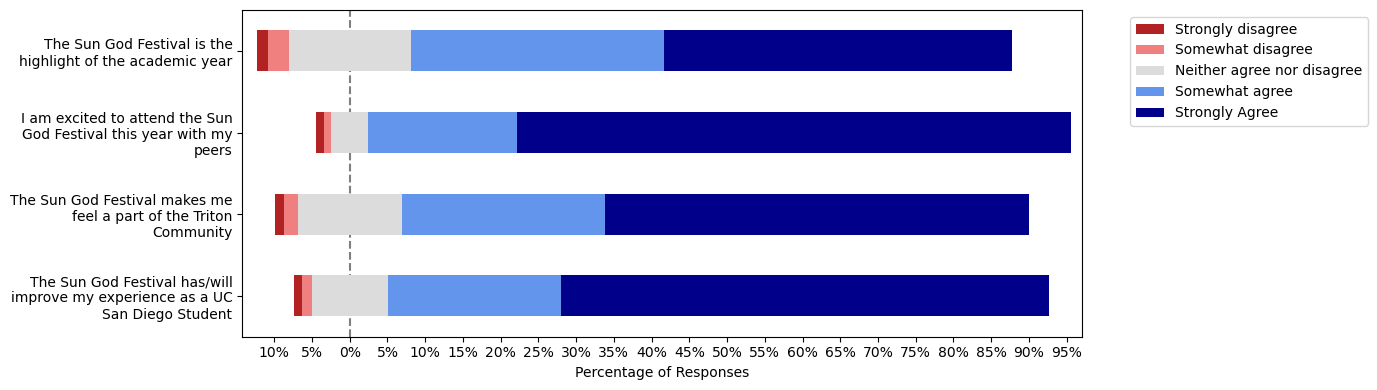

In [10]:
q10data = asce25[['Q10_1', 'Q10_2', 'Q10_3', 'Q10_4']].iloc[2:]
q10data.rename(columns={'Q10_1': 'The Sun God Festival is the highlight of the academic year',
                       'Q10_2': 'I am excited to attend the Sun God Festival this year with my peers',
                       'Q10_3': 'The Sun God Festival makes me feel a part of the Triton Community',
                       'Q10_4': 'The Sun God Festival has/will improve my experience as a UC San Diego Student'}, inplace=True)

likert_scale = ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree','Strongly Agree']
ax = plot_likert.plot_likert(q10data, likert_scale, plot_percentage=True, figsize=(14, 4))
plt.tight_layout()
plt.show()

#### In your own words, how would you describe the Sun God Festival?

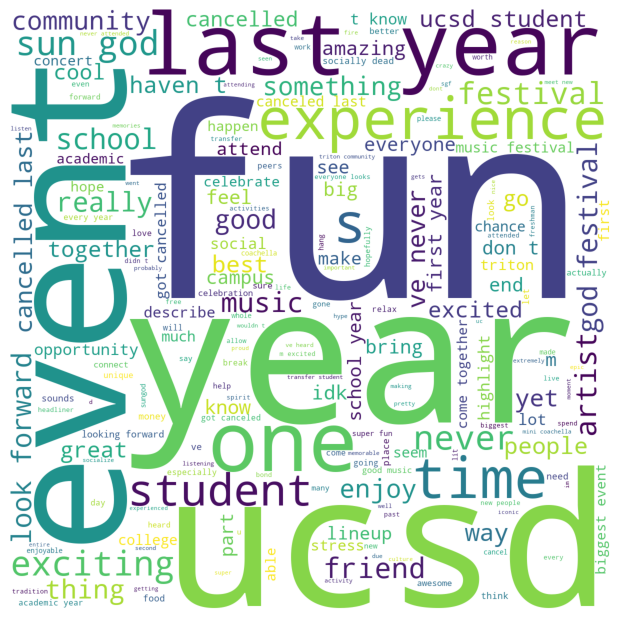

In [11]:
q11data = asce25['Q11.1'].dropna()

comment_words = ''
stopwords = set(STOPWORDS)

for val in q11data:
    val = str(val)
    tokens = val.strip().split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
sgfwordcloud = WordCloud(width=1200, height=1200, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)
              
plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(sgfwordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

<Axes: xlabel='Q12'>

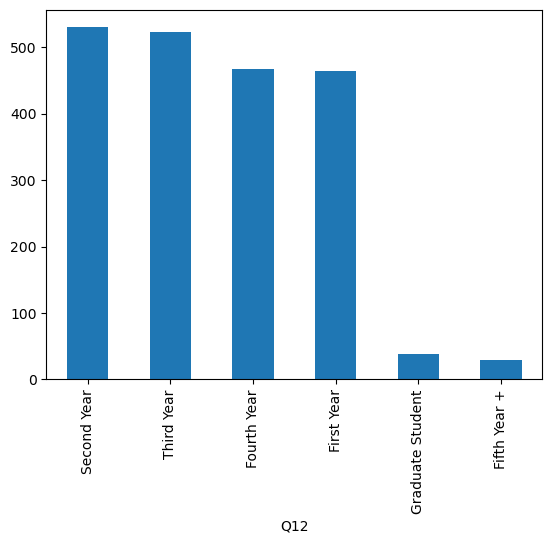

In [12]:
# asce25['Q12'].value_counts()

years = ['First Year', 'Second Year', 'Third Year', 'Fourth Year', 'Fifth Year +', 'Graduate Student']
mapping = {year: i for i, year in enumerate(years)}
q12data = asce25['Q12'].iloc[2:].map(mapping)
ret = asce25['Q12'].iloc[2:].iloc[q12data.argsort()]

ret.value_counts().plot(kind='bar', )



# weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
# mapping = {day: i for i, day in enumerate(weekdays)}
# key = df['day'].map(mapping)

# df.iloc[key.argsort()]
